In [9]:
# Imports
import sys
import os
import pickle
import matplotlib.pyplot as plt
from pde import MemoryStorage

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from AdvectionDiffusionlimitScript import *


%matplotlib widget

In [10]:
# Load simulation parameters
import pickle

eSource1, eSource2, NB_PARTICLES = pickle.load(open('simargv.pkl', 'rb'))
tmax1 = eSource1
tmax2 = eSource2

In [11]:
# solve the equation and store the trajectory
storage1 = MemoryStorage()
result1 = eq1.solve(state, t_range=tmax1, tracker=storage1.tracker(1), dt=1e-5)

storage2 = MemoryStorage()
result2 = eq2.solve(state, t_range=tmax2, tracker=storage2.tracker(1), dt=1e-5)

In [12]:
trackEndEstimatorx1 = pickle.load(open(file1, 'rb'))[0]
trackEndEstimatorx2 = pickle.load(open(file2, 'rb'))[0]

Text(0.5, 0.98, 'Diffusion limit')

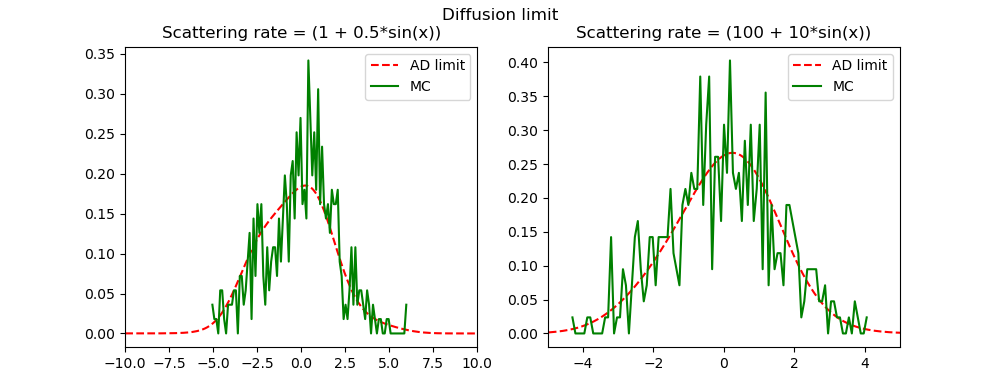

In [13]:
# Plot solutions

# Advection-diffusion solution 1
ADres1 = storage1.data[-1]
ADres2 = storage2.data[-1]
xres = np.linspace(-xmax, xmax, xbins, endpoint=False)
 
# MC solution 1
xdensity1 = trackEndEstimatorx1.scoreMatrix
binVal1, binEdge1 = np.histogram(xdensity1, bins=100, density=True)
binCenter1 = (binEdge1[:-1] + binEdge1[1:])/2.0

# MC solution 2
xdensity2 = trackEndEstimatorx2.scoreMatrix
binVal2, binEdge2 = np.histogram(xdensity2, bins=100, density=True)
binCenter2 = (binEdge2[:-1] + binEdge2[1:])/2.0

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.9))
ax1.plot(xres, ADres1, 'r--', label=f'AD limit')
ax1.plot(binCenter1, binVal1, 'g', label=f'MC')
ax1.set_xlim((-10, 10))
ax1.legend()
ax1.set_title(f'Scattering rate = {scatteringRate1}')

ax2.plot(xres, ADres2, 'r--', label=f'AD limit')
ax2.plot(binCenter2, binVal2, 'g', label=f'MC')
ax2.set_xlim((-5, 5))
ax2.legend()
ax2.set_title(f'Scattering rate = {scatteringRate2}')

fig.suptitle('Diffusion limit')
